In [44]:
import numpy as np
import pandas as pd


# set random seed 
np.random.seed(42)

n_samples = 2000

study_hours = np.random.normal(5,2,n_samples).clip(0,10) # mean 5 , std 2 ,clipped = 0-10
sleep_hours = np.random.normal(7,2,n_samples).clip(4,10)
prior_test_score = np.random.normal(40,15,n_samples).clip(0,100)

# simulate pass/Fail (1/0)
logit = -5 + 0.5 * study_hours + 0.3 * sleep_hours + 0.05 * prior_test_score
probs = 1 / (1 + np.exp(-logit)) # sigmoid
pass_exam = (probs > 0.5 + np.random.normal(0,0.1,n_samples)).astype(int)

# create a dataframe
data = pd.DataFrame({
    'study_hours':study_hours,
    'sleep_hours':sleep_hours,
    'prior_test_score':prior_test_score,
    'pass_exam':pass_exam
})

# save csv
data .to_csv('student_data.csv',index=False)

In [45]:
print(data.head())

   study_hours  sleep_hours  prior_test_score  pass_exam
0     5.993428     5.649643         27.047596          1
1     4.723471     6.710963         39.531948          1
2     6.295377     5.415160         40.270253          1
3     8.046060     6.384077         47.089455          1
4     4.531693     4.000000         19.497125          0


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# load dataset 
data = pd.read_csv('student_data.csv')

In [48]:
X = data[['study_hours','sleep_hours','prior_test_score']]
y = data['pass_exam']

In [49]:
# split data into traning and testing set 
X_train , X_test , y_train , y_test = train_test_split(X,y ,test_size = 0.2, random_state=42)

In [50]:
# model
model = LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

# predict on test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

print(y_pred)

0.94
[[ 27  18]
 [  6 349]]
[1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [51]:
print(f'{accuracy*100:.2f}%')
print(conf_matrix)
print(f'intercept a0 = {model.intercept_[0]:.4f}')
print(f'coefficients  a1 for each feature = {model.coef_[0]}')


94.00%
[[ 27  18]
 [  6 349]]
intercept a0 = -22.0163
coefficients  a1 for each feature = [2.21413946 1.30120203 0.22239312]


In [56]:
# prediction for new students 
new_student = np.array([[1,4,30]])
# 5 study_hours  7 sleep_hours 80 prior_test_score
pred_prob = model.predict_proba(new_student)[0][1] # probability of passing 
pred_class = model.predict(new_student)[0]
# print(f'new student  5 study hrs , 7 sleep and 80 score')
print(f'predicted probability {pred_prob:.4f}')
print(f'Predicted class {pred_class} = [0 fail / 1 pass]')

predicted probability 0.0004
Predicted class 0 = [0 fail / 1 pass]


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


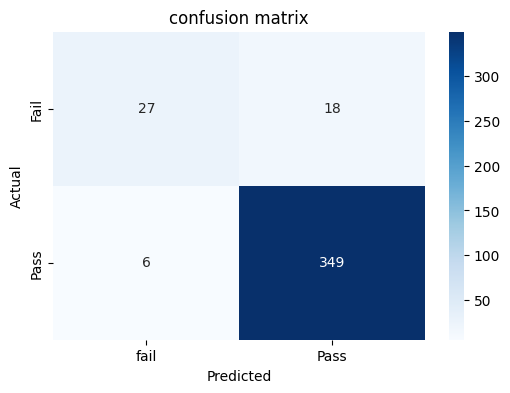

In [54]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',
            xticklabels=['fail','Pass'],yticklabels=['Fail','Pass'])
plt.title('confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()